<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/LSTM_Week_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import tensorflow as tf
import pandas_datareader.data as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import time
plt.style.use('fivethirtyeight') 

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [ ]:
# pip install alpha_vantage

In [ ]:
# api_key = '5LLGMLRK81AS4OEH'

In [ ]:
import pandas as pd
# from alpha_vantage.timeseries import TimeSeries
import time
import matplotlib.pyplot as plt
from datetime import date
from datetime import time
# from alpha_vantage.foreignexchange import ForeignExchange

In [ ]:
# ts = TimeSeries(key=api_key,output_format='pandas')
# df_1, meta_data = ts.get_daily(symbol='IBM', outputsize='full')
# df_1 = df_1[::-1]
# print(df_1.tail(30))

In [ ]:
# Get the stock quote
df_1 = web.DataReader('TATAMOTORS.NS', data_source='yahoo',start = '2000-01-25', end = '2020-08-14')

In [ ]:
df_1

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-25,39.265099,37.674599,38.393200,37.674599,3684803.0,12.184047
2000-01-27,36.984699,34.666000,36.409801,34.666000,9020094.0,11.211061
2000-01-28,34.876801,32.261002,32.768799,33.573700,13942904.0,10.857810
2000-01-31,36.160702,32.586800,32.797600,34.436001,14875954.0,11.136679
2000-02-01,35.432499,32.979599,34.474300,33.592800,6294485.0,10.863985
...,...,...,...,...,...,...
2020-08-10,124.699997,119.699997,119.949997,123.849998,71093810.0,123.849998
2020-08-11,125.800003,121.400002,125.000000,122.300003,50224665.0,122.300003
2020-08-12,126.400002,120.599998,121.000000,125.349998,50713617.0,125.349998


In [ ]:
df_2 = df_1[::2]
df_3 = df_1[::3]
df_4 = df_1[::4]
df_5 = df_1[::5]
df_6 = df_1[::6]
df_7 = df_1[::7]

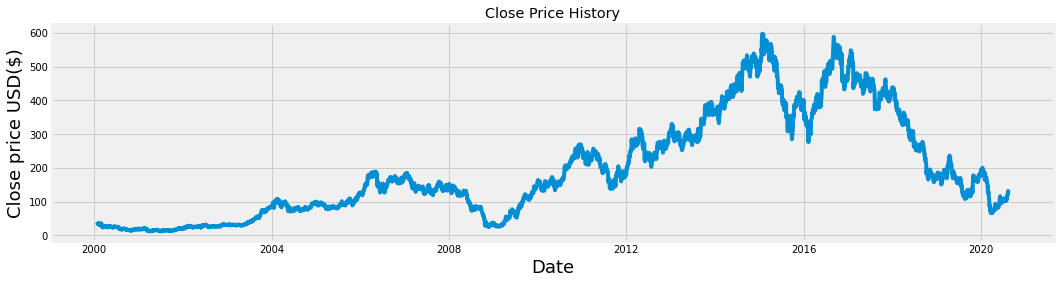

In [ ]:
# Close price history
plt.figure(figsize=(16,4))
plt.title('Close Price History')
plt.plot(df_1['Close'],);
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD($)', fontsize = 18)
plt.show()

In [ ]:
# Create new dataframe with only close coloumn
data_1 = df_1.filter(['Close'])
data_2 = df_2.filter(['Close'])
data_3 = df_3.filter(['Close'])
data_4 = df_4.filter(['Close'])
data_5 = df_5.filter(['Close'])
data_6 = df_6.filter(['Close'])
data_7 = df_7.filter(['Close'])
# Convert dataframe to numpy array
dataset_1 = data_1.values
dataset_2 = data_2.values
dataset_3 = data_3.values
dataset_4 = data_4.values
dataset_5 = data_5.values
dataset_6 = data_6.values
dataset_7 = data_7.values
# Get the number of rows to train the model on
training_data_len_1 = math.ceil( len(dataset_1) * 0.99)
training_data_len_2 = math.ceil( len(dataset_2) * 0.99)
training_data_len_3 = math.ceil( len(dataset_3) * 0.99)
training_data_len_4 = math.ceil( len(dataset_4) * 0.99)
training_data_len_5 = math.ceil( len(dataset_5) * 0.99)
training_data_len_6 = math.ceil( len(dataset_6) * 0.99)
training_data_len_7 = math.ceil( len(dataset_7) * 0.99)

In [ ]:
print(training_data_len_1,training_data_len_2,training_data_len_3,training_data_len_4,training_data_len_5,training_data_len_6,training_data_len_7)

5030 2515 1678 1258 1006 839 719


In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data_1 = scaler.fit_transform(dataset_1)
scaled_data_2 = scaler.fit_transform(dataset_2)
scaled_data_3 = scaler.fit_transform(dataset_3)
scaled_data_4 = scaler.fit_transform(dataset_4)
scaled_data_5 = scaler.fit_transform(dataset_5)
scaled_data_6 = scaler.fit_transform(dataset_6)
scaled_data_7 = scaler.fit_transform(dataset_7)

In [ ]:
# Create training datasets
# Create the scaled training datasets
train_data_1 = scaled_data_1[0:training_data_len_1,:]
train_data_2 = scaled_data_2[0:training_data_len_2,:]
train_data_3 = scaled_data_3[0:training_data_len_3,:]
train_data_4 = scaled_data_4[0:training_data_len_4,:]
train_data_5 = scaled_data_5[0:training_data_len_5,:]
train_data_6 = scaled_data_6[0:training_data_len_6,:]
train_data_7 = scaled_data_7[0:training_data_len_7,:]
# Slit x_train and y_train datasets
x_train_1 = []
y_train_1 = []
x_train_2 = []
y_train_2 = []
x_train_3 = []
y_train_3 = []
x_train_4 = []
y_train_4 = []
x_train_5 = []
y_train_5 = []
x_train_6 = []
y_train_6 = []
x_train_7 = []
y_train_7 = []

In [ ]:
for i in range(60,len(train_data_1)):
  x_train_1.append(train_data_1[i-60:i,0])
  y_train_1.append(train_data_1[i,0])
  if i<=60:
    print(x_train_1)
    print(y_train_1)
    print() 
for i in range(60,len(train_data_2)):
  x_train_2.append(train_data_2[i-60:i,0])
  y_train_2.append(train_data_2[i,0])
  if i<=60:
    print(x_train_2)
    print(y_train_2)
    print() 
for i in range(60,len(train_data_3)):
  x_train_3.append(train_data_3[i-60:i,0])
  y_train_3.append(train_data_3[i,0])
  if i<=60:
    print(x_train_3)
    print(y_train_3)
    print() 
for i in range(60,len(train_data_4)):
  x_train_4.append(train_data_4[i-60:i,0])
  y_train_4.append(train_data_4[i,0])
  if i<=60:
    print(x_train_4)
    print(y_train_4)
    print() 
for i in range(60,len(train_data_5)):
  x_train_5.append(train_data_5[i-60:i,0])
  y_train_5.append(train_data_5[i,0])
  if i<=60:
    print(x_train_5)
    print(y_train_5)
    print() 
for i in range(60,len(train_data_6)):
  x_train_6.append(train_data_6[i-60:i,0])
  y_train_6.append(train_data_6[i,0])
  if i<=60:
    print(x_train_6)
    print(y_train_6)
    print() 
for i in range(60,len(train_data_7)):
  x_train_7.append(train_data_7[i-60:i,0])
  y_train_7.append(train_data_7[i,0])
  if i<=60:
    print(x_train_7)
    print(y_train_7)
    print() 

[array([0.04499612, 0.03986957, 0.03800833, 0.03947766, 0.03804088,
       0.03960835, 0.03871036, 0.0392328 , 0.03885725, 0.0397716 ,
       0.04076756, 0.03993483, 0.03622871, 0.03232662, 0.03493898,
       0.03462868, 0.03511857, 0.03115106, 0.03518384, 0.03954292,
       0.03567355, 0.03639195, 0.04052253, 0.03991847, 0.03520019,
       0.03226136, 0.02873483, 0.02491437, 0.0261063 , 0.02393476,
       0.02243271, 0.02576329, 0.02305313, 0.02009794, 0.02324909,
       0.02494709, 0.02827766, 0.02963282, 0.02865321, 0.02527357,
       0.02496327, 0.02499599, 0.02439194, 0.02484911, 0.02218786,
       0.02530611, 0.02739603, 0.02367354, 0.02440829, 0.02282463,
       0.02612249, 0.02640006, 0.02584491, 0.02496327, 0.02292261,
       0.02383678, 0.02052257, 0.02146946, 0.02086541, 0.02184502])]
[0.022416356911515476]

[array([0.04499612, 0.03800833, 0.03804088, 0.03871036, 0.03885725,
       0.04076756, 0.03622871, 0.03493898, 0.03511857, 0.03518384,
       0.03567355, 0.04052253, 0.0

In [ ]:
# convert x_train y_train to numpy arrays
x_train_1, y_train_1 = np.array(x_train_1), np.array(y_train_1)
x_train_2, y_train_2 = np.array(x_train_2), np.array(y_train_2)
x_train_3, y_train_3 = np.array(x_train_3), np.array(y_train_3)
x_train_4, y_train_4 = np.array(x_train_4), np.array(y_train_4)
x_train_5, y_train_5 = np.array(x_train_5), np.array(y_train_5)
x_train_6, y_train_6 = np.array(x_train_6), np.array(y_train_6)
x_train_7, y_train_7 = np.array(x_train_7), np.array(y_train_7)

In [ ]:
# Reshape the data
x_train_1 = np.reshape(x_train_1,(x_train_1.shape[0], x_train_1.shape[1],1))
x_train_2 = np.reshape(x_train_2,(x_train_2.shape[0], x_train_2.shape[1],1))
x_train_3 = np.reshape(x_train_3,(x_train_3.shape[0], x_train_3.shape[1],1))
x_train_4 = np.reshape(x_train_4,(x_train_4.shape[0], x_train_4.shape[1],1))
x_train_5 = np.reshape(x_train_5,(x_train_5.shape[0], x_train_5.shape[1],1))
x_train_6 = np.reshape(x_train_6,(x_train_6.shape[0], x_train_6.shape[1],1))
x_train_7 = np.reshape(x_train_7,(x_train_7.shape[0], x_train_7.shape[1],1))

In [ ]:
print(x_train_1.shape,x_train_2.shape,x_train_3.shape,x_train_4.shape,x_train_5.shape,x_train_6.shape,x_train_7.shape)

(4970, 60, 1) (2455, 60, 1) (1618, 60, 1) (1198, 60, 1) (946, 60, 1) (779, 60, 1) (659, 60, 1)


In [ ]:
# Build LSTM Model 1
model_1 = Sequential()
model_1.add(LSTM(50,return_sequences=True, input_shape = (x_train_1.shape[1],1)))
model_1.add(LSTM(50, return_sequences=False))
model_1.add(Dense(15))
model_1.add(Dense(1))

In [ ]:
# Build LSTM Model 2
model_2 = Sequential()
model_2.add(LSTM(50,return_sequences=True, input_shape = (x_train_2.shape[1],1)))
model_2.add(LSTM(50, return_sequences=False))
model_2.add(Dense(15))
model_2.add(Dense(1))

In [ ]:
# Build LSTM Model 3
model_3 = Sequential()
model_3.add(LSTM(50,return_sequences=True, input_shape = (x_train_3.shape[1],1)))
model_3.add(LSTM(50, return_sequences=False))
model_3.add(Dense(15))
model_3.add(Dense(1))

In [ ]:
# Build LSTM Model 4
model_4 = Sequential()
model_4.add(LSTM(50,return_sequences=True, input_shape = (x_train_4.shape[1],1)))
model_4.add(LSTM(50, return_sequences=False))
model_4.add(Dense(15))
model_4.add(Dense(1))

In [ ]:
# Build LSTM Model 5
model_5 = Sequential()
model_5.add(LSTM(50,return_sequences=True, input_shape = (x_train_5.shape[1],1)))
model_5.add(LSTM(50, return_sequences=False))
model_5.add(Dense(15))
model_5.add(Dense(1))

In [ ]:
# Build LSTM Model 6
model_6 = Sequential()
model_6.add(LSTM(50,return_sequences=True, input_shape = (x_train_6.shape[1],1)))
model_6.add(LSTM(50, return_sequences=False))
model_6.add(Dense(15))
model_6.add(Dense(1))

In [ ]:
# Build LSTM Model 7
model_7 = Sequential()
model_7.add(LSTM(50,return_sequences=True, input_shape = (x_train_7.shape[1],1)))
model_7.add(LSTM(50, return_sequences=False))
model_7.add(Dense(15))
model_7.add(Dense(1))

In [ ]:
model_1.compile(optimizer='adam',loss='mse')
model_2.compile(optimizer='adam',loss='mse')
model_3.compile(optimizer='adam',loss='mse')
model_4.compile(optimizer='adam',loss='mse')
model_5.compile(optimizer='adam',loss='mse')
model_6.compile(optimizer='adam',loss='mse')
model_7.compile(optimizer='adam',loss='mse')

In [ ]:
model_1.fit(x_train_1,y_train_1,batch_size=1, epochs = 2,)
model_2.fit(x_train_2,y_train_2,batch_size=1, epochs = 4,)
model_3.fit(x_train_3,y_train_3,batch_size=1, epochs = 8,)
model_4.fit(x_train_4,y_train_4,batch_size=1, epochs = 8,)
model_5.fit(x_train_5,y_train_5,batch_size=1, epochs = 10,)
model_6.fit(x_train_6,y_train_6,batch_size=1, epochs = 25,)
model_7.fit(x_train_7,y_train_7,batch_size=1, epochs = 30,)

Epoch 1/2
4970/4970 [==============================] - 112s 23ms/step - loss: 8.7960e-04
Epoch 2/2
4970/4970 [==============================] - 110s 22ms/step - loss: 3.6129e-04
Epoch 1/4
2455/2455 [==============================] - 55s 22ms/step - loss: 0.0018
Epoch 2/4
2455/2455 [==============================] - 55s 22ms/step - loss: 7.7233e-04
Epoch 3/4
2455/2455 [==============================] - 54s 22ms/step - loss: 5.0137e-04
Epoch 4/4
2455/2455 [==============================] - 57s 23ms/step - loss: 4.7312e-04
Epoch 1/8
1618/1618 [==============================] - 37s 23ms/step - loss: 0.0028
Epoch 2/8
1618/1618 [==============================] - 36s 22ms/step - loss: 0.0011
Epoch 3/8
1618/1618 [==============================] - 36s 22ms/step - loss: 8.5484e-04
Epoch 4/8
1618/1618 [==============================] - 36s 22ms/step - loss: 7.1973e-04
Epoch 5/8
1618/1618 [==============================] - 36s 22ms/step - loss: 6.1515e-04
Epoch 6/8
1618/1618 [=====================

In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data_1 = scaled_data_1[training_data_len_1-60: ,:]
# Create dataset x_test_1, y_test_1 
x_test_1 = []
y_test_1 = dataset_1[training_data_len_1: ,:]
for i in range(60, len(test_data_1)):
  x_test_1.append(test_data_1[i-60:i, 0])

In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data_2 = scaled_data_2[training_data_len_2-60: ,:]
# Create dataset x_test_2, y_test_2 
x_test_2 = []
y_test_2 = dataset_2[training_data_len_2: ,:]
for i in range(60, len(test_data_2)):
  x_test_2.append(test_data_2[i-60:i, 0])

In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data_3 = scaled_data_3[training_data_len_3-60: ,:]
# Create dataset x_test_3, y_test_3 
x_test_3 = []
y_test_3 = dataset_3[training_data_len_3: ,:]
for i in range(60, len(test_data_3)):
  x_test_3.append(test_data_3[i-60:i, 0])


In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data_4 = scaled_data_4[training_data_len_4-60: ,:]
# Create dataset x_test_4, y_test_4 
x_test_4 = []
y_test_4 = dataset_4[training_data_len_4: ,:]
for i in range(60, len(test_data_4)):
  x_test_4.append(test_data_4[i-60:i, 0])

In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data_5 = scaled_data_5[training_data_len_5-60: ,:]
# Create dataset x_test_5, y_test_5 
x_test_5 = []
y_test_5 = dataset_5[training_data_len_5: ,:]
for i in range(60, len(test_data_5)):
  x_test_5.append(test_data_5[i-60:i, 0])

In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data_6 = scaled_data_6[training_data_len_6-60: ,:]
# Create dataset x_test_6, y_test_6 
x_test_6 = []
y_test_6 = dataset_6[training_data_len_6: ,:]
for i in range(60, len(test_data_6)):
  x_test_6.append(test_data_6[i-60:i, 0])

In [ ]:
# Crete testing datasets
# Create a new array containing scaled value from index 1704 to 2130
test_data_7 = scaled_data_7[training_data_len_7-60: ,:]
# Create dataset x_test_7, y_test_7 
x_test_7 = []
y_test_7 = dataset_7[training_data_len_7: ,:]
for i in range(60, len(test_data_7)):
  x_test_7.append(test_data_7[i-60:i, 0])

In [ ]:
print(x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7)

[array([0.19507364, 0.17539282, 0.16090911, 0.14932215, 0.13074891,
       0.13373085, 0.12214388, 0.11362404, 0.10944933, 0.10510421,
       0.11251648, 0.09360244, 0.09760677, 0.10050351, 0.1014407 ,
       0.10127029, 0.09692518, 0.10186669, 0.09658438, 0.09206888,
       0.09539161, 0.095988  , 0.10791576, 0.10731937, 0.10501902,
       0.10800096, 0.11174968, 0.11788396, 0.10800096, 0.11013092,
       0.10970493, 0.10723417, 0.10902334, 0.11192008, 0.11396485,
       0.13969473, 0.12376265, 0.11865075, 0.12256987, 0.1213771 ,
       0.11890635, 0.12751137, 0.12768177, 0.12938573, 0.12359226,
       0.12452943, 0.11822476, 0.12018432, 0.12299586, 0.12410344,
       0.12188829, 0.12239947, 0.12487023, 0.12904494, 0.12904494,
       0.13339006, 0.14523262, 0.14906655, 0.14864056, 0.16951414]), array([0.17539282, 0.16090911, 0.14932215, 0.13074891, 0.13373085,
       0.12214388, 0.11362404, 0.10944933, 0.10510421, 0.11251648,
       0.09360244, 0.09760677, 0.10050351, 0.1014407 , 0.10

In [ ]:
x_test_1 = x_test_1[-1:]
x_test_2 = x_test_2[-1:]
x_test_3 = x_test_3[-1:]
x_test_4 = x_test_4[-1:]
x_test_5 = x_test_5[-1:]
x_test_6 = x_test_6[-1:]
x_test_7 = x_test_7[-1:]

In [ ]:
print(x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7)

[array([0.12410344, 0.12188829, 0.12239947, 0.12487023, 0.12904494,
       0.12904494, 0.13339006, 0.14523262, 0.14906655, 0.14864056,
       0.16951414, 0.17752278, 0.17070691, 0.17062172, 0.1616759 ,
       0.16022753, 0.15204849, 0.14225068, 0.14335826, 0.14497703,
       0.15545642, 0.15571202, 0.15869396, 0.15937555, 0.15767158,
       0.15358206, 0.15025932, 0.14821457, 0.15247448, 0.15383766,
       0.15707518, 0.1665322 , 0.16661741, 0.16031272, 0.16303907,
       0.16414665, 0.16482824, 0.15997193, 0.15664919, 0.1562232 ,
       0.16210189, 0.15980154, 0.16559502, 0.15997193, 0.16150551,
       0.15758638, 0.15409324, 0.16218708, 0.16099431, 0.15741599,
       0.15911995, 0.17343327, 0.17070691, 0.17743759, 0.17982314,
       0.18374226, 0.1918361 , 0.18919496, 0.19439205, 0.20427505])] [array([0.26894059, 0.25011175, 0.23750239, 0.22710821, 0.20052632,
       0.20291189, 0.19507364, 0.16090911, 0.13074891, 0.12214388,
       0.10944933, 0.11251648, 0.09760677, 0.1014407 , 0.0

In [ ]:
x_test_1 = np.array(x_test_1)
x_test_2 = np.array(x_test_2)
x_test_3 = np.array(x_test_3)
x_test_4 = np.array(x_test_4)
x_test_5 = np.array(x_test_5)
x_test_6 = np.array(x_test_6)
x_test_7 = np.array(x_test_7)

In [ ]:
x_test_1.shape

(1, 60)

In [ ]:
# Reshape the data
x_test_1 = np.reshape(x_test_1,(x_test_1.shape[0],x_test_1.shape[1],1))
x_test_2 = np.reshape(x_test_2,(x_test_2.shape[0],x_test_2.shape[1],1))
x_test_3 = np.reshape(x_test_3,(x_test_3.shape[0],x_test_3.shape[1],1))
x_test_4 = np.reshape(x_test_4,(x_test_4.shape[0],x_test_4.shape[1],1))
x_test_5 = np.reshape(x_test_5,(x_test_5.shape[0],x_test_5.shape[1],1))
x_test_6 = np.reshape(x_test_6,(x_test_6.shape[0],x_test_6.shape[1],1))
x_test_7 = np.reshape(x_test_7,(x_test_7.shape[0],x_test_7.shape[1],1))

In [ ]:
x_test_3.shape

(1, 60, 1)

In [ ]:
predictions = []
predictions.append(model_1.predict(x_test_1))
predictions.append(model_2.predict(x_test_2))
predictions.append(model_3.predict(x_test_3))
predictions.append(model_4.predict(x_test_4))
predictions.append(model_5.predict(x_test_5))
predictions.append(model_6.predict(x_test_6))
predictions.append(model_7.predict(x_test_7))

In [ ]:
predictions = np.array(predictions)

In [ ]:
predictions = np.reshape(predictions,(-1,7))

In [ ]:
predictions

array([[0.19909728, 0.17859422, 0.18618405, 0.16981252, 0.19006477,
        0.18291876, 0.17071603]], dtype=float32)

In [ ]:
# Get model prediction price value
predictions = scaler.inverse_transform(predictions)

In [ ]:
predictions

array([[124.88838 , 113.26469 , 117.56755 , 108.286125, 119.76763 ,
        115.71638 , 108.798355]], dtype=float32)

In [ ]:
print(df_1['Close'][-1],df_2['Close'][-1],df_3['Close'][-1],df_4['Close'][-1],df_5['Close'][-1],df_6['Close'][-1],df_7['Close'][-1])

124.5999984741211 131.14999389648438 124.5999984741211 122.30000305175781 123.8499984741211 122.30000305175781 123.8499984741211


In [ ]:
predictions_low = predictions-10

In [ ]:
predictions_high = predictions + 10

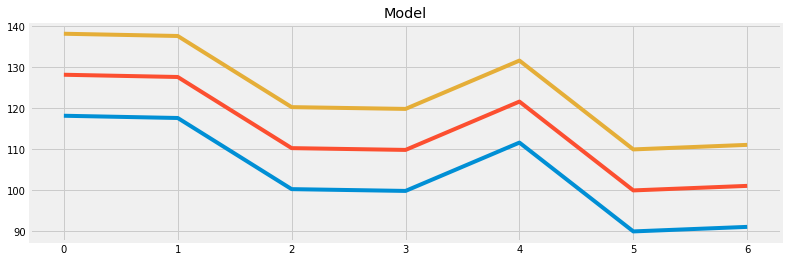

In [ ]:
plt.figure(figsize=(12,4))
plt.title("Model")
plt.plot(predictions_low[0])
plt.plot(predictions[0])
plt.plot(predictions_high[0],)